<font style="font-size:96px; font-weight:bolder; color:#0040a0"><img src="http://montage.ipac.caltech.edu/docs/M51_logo.png" alt="M" style="float: left; padding: 25px 30px 25px 0px;" /></font>

<i><b>Montage</b> Montage is an astronomical image toolkit with components for reprojection, background matching, coaddition and visualization of FITS files. It can be used as a set of command-line tools (Linux, OS X and Windows), C library calls (Linux and OS X) and as Python binary extension modules.

The Montage source is written in ANSI-C and code can be downloaded from GitHub ( https://github.com/Caltech-IPAC/Montage ). The Python package can be installed from PyPI ("</i>pip install MontagePy<i>"). The package has no external dependencies. See http://montage.ipac.caltech.edu/ for details on the design and applications of Montage.


# MontagePy.main modules: mSubimage

It is often the case that only a small piece of an image is needed for science or visualization purposes. mSubimage provides a way to cut out such a piece and still maintain all the header and projection information. 

In [3]:
from MontagePy.main import mSubimage, mViewer

help(mSubimage)

Help on built-in function mSubimage in module MontagePy.main:

mSubimage(...)
    mSubimage extracts a subimage from one FITS file into a new FITS file.
    
    Parameters
    ----------
    infile : str
        Input FITS file.
    outfile : str
        Subimage output FITS file.
    ra : float
        RA of cutout center (or start X pixel in PIX mode.
    dec : float
        Dec of cutout center (or start X pixel in PIX mode.
    xsize : float
        X size in degrees (SKY mode) or pixels (PIX mode).
    ysize : float
        Y size in degrees (SKY mode) or pixels (PIX mode).
    mode : int, optional
        Processing mode. The two main modes are 0 (SKY) and 1 (PIX), corresponding to cutouts are in sky coordinate or pixel space. The two other modes are 3 (HDU) and 4 (SHRINK), where the region parameters are ignored and you get back either a single HDU or an image that has had all the blank border pixels removed.
    hdu : int, optional
        Optional HDU offset for input file.
 

## mSubImage Example

In this example, we will cut a small region from the center of a large mosaic, using the default center coordinate/size mode:


In [4]:
rtn = mSubimage('M17/mosaic_small.fits', 
                'work/M17/mosaic_small_subimage.fits',
                275.19629, -16.17153, 0.3, 0.3)
print(rtn)

{'status': '0', 'content': b'normal'}


### Before and After

Here are the original image and the cutout:

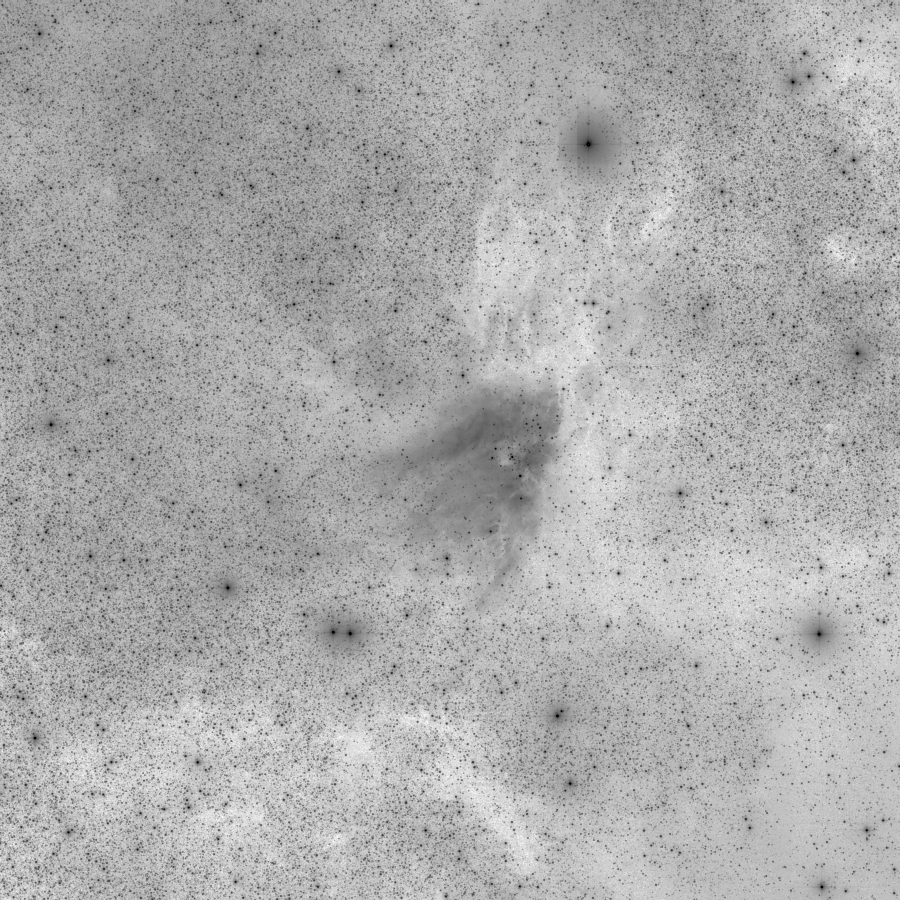

In [5]:
from IPython.display import HTML, display, Image

mViewer('-ct 1 -gray M17/mosaic_small.fits \
         -2s max gaussian-log -out work/M17/mosaic_small.png',
        '', mode=2)

Image(filename='work/M17/mosaic_small.png')

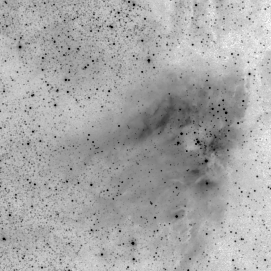

In [6]:
mViewer('-ct 1 -gray work/M17/mosaic_small_subimage.fits \
         -2s max gaussian-log -out work/M17/mosaic_small_subimage.png',
        '', mode=2)

Image(filename='work/M17/mosaic_small_subimage.png')

&nbsp;<p/>

## Error Handling

If mSubimage encounters an error, the return structure will just have two elements: a status of 1 ("error") and a message string that tries to diagnose the reason for the error.

For instance, if the user specifies an image that doesn't exist: 


In [27]:
rtn = mSubimage('input/M17/unknown.fits', 
                'work/M17/cutout.fits', 
                275.19629, -16.17153, 0.3, 0.3)

print(rtn)

{'status': '1', 'msg': b'File input/M17/unknown.fits not found.'}


&nbsp;

## Classic Montage: mSubimage as a Stand-Alone Program

### mSubimage Unix/Windows Command-line Arguments

<p>mSubimage can also be run as a command-line tool in Linux, OS X, and Windows:</p>

<p><tt>
<b>Usage:</b> mSubimage [-d][-a(ll pixels)][-h hdu][-s statusfile] in.fit out.fit ra dec xsize [ysize] | mSubimage -p [-d][-h hdu][-s statusfile] in.fit out.fit xstartpix ystartpix xpixsize [ypixsize] | mSubimage -c [-d][-h hdu][-s statusfile] in.fit out.fit
</tt></p>
<p>&nbsp;</p>
<p>If you are writing in C/C++, mSubimage can be accessed as a library function:</p>


<pre>
/*-***********************************************************************/
/*                                                                       */
/*  mSubimage                                                            */
/*                                                                       */
/*  This program subsets an input image around a location of interest    */
/*  and creates a new output image consisting of just those pixels.      */
/*  The location is defined by the RA,Dec (J2000) of the new center and  */
/*  the XY size in degrees of the area (X and Y) in the direction of     */
/*  the image axes, not Equatorial coordinates.                          */
/*                                                                       */
/*   char  *infile         Input FITS file                               */
/*   char  *outfile        Subimage output FITS file                     */
/*                                                                       */
/*   double ra             RA of cutout center (or start X pixel in      */
/*                         PIX mode                                      */
/*   double dec            Dec of cutout center (or start Y pixel in     */
/*                         PIX mode                                      */
/*                                                                       */
/*   double xsize          X size in degrees (SKY mode) or pixels        */
/*                         (PIX mode)                                    */
/*   double ysize          Y size in degrees (SKY mode) or pixels        */
/*                         (PIX mode)                                    */
/*                                                                       */
/*   int    mode           Processing mode. The two main modes are       */
/*                         0 (SKY) and 1 (PIX), corresponding to cutouts */
/*                         are in sky coordinate or pixel space. The two */
/*                         other modes are 3 (HDU) and 4 (SHRINK), where */
/*                         the region parameters are ignored and you get */
/*                         back either a single HDU or an image that has */
/*                         had all the blank border pixels removed.      */
/*                                                                       */
/*   int    hdu            Optional HDU offset for input file            */
/*   int    nowcs          Indicates that the image has no WCS info      */
/*                         (only makes sense in PIX mode)                */
/*                                                                       */
/*   int    debug          Debugging output level                        */
/*                                                                       */
/*************************************************************************/

struct mSubimageReturn *mSubimage(char *infile, char *outfile, double ra, double dec, 
                                  double xsize, double ysize, int mode, int hdu, int nowcs, int debugin)
</pre>
<p><b>Return Structure</b></p>
<pre>
struct mSubimageReturn
{
   int    status;        // Return status (0: OK, 1:ERROR)
   char   msg    [1024]; // Return message (for error return)
   char   json   [4096]; // Return parameters as JSON string
   char   content[1024]; // String giving an idea of output content (e.g., 'blank', 'flat', or 'normal'.   
};
</pre>